In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
file_coverage = "./virus_proteins_pdb_structure_template_coverage_updated.csv"
#file_coverage = "./virus_proteins_ef_cf_coverage.csv"
df_coverage = pd.read_csv(file_coverage)
file_ictv = "~/1_dataset_preparation/msl38v2/VMR_MSL38_v2.xlsx"
df_ictv = pd.read_excel(file_ictv)

In [33]:
df_coverage.head(5)

,header,protein_id,Sort,pept_cat,protlen,ef_coverage,cf_coverage,ef_pdb_structure_coverage,cf_pdb_structure_coverage,ef_pdb_template_coverage,cf_pdb_template_coverage,ef_90%_pdb_structure_coverage,cf_90%_pdb_structure_coverage
0,CAA52564.1_4563,CAA52564.1,4563,protein,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AIW68525.1_11911,AIW68525.1,11911,protein,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AIW68499.1_11911,AIW68499.1,11911,protein,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AOO54533.1_11976,AOO54533.1,11976,protein,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAA67112.1_4989,AAA67112.1,4989,protein,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
df_ictv.head(5)

,Sort,Isolate Sort,Realm,Subrealm,Kingdom,Subkingdom,Phylum,Subphylum,Class,Subclass,...,Species,Exemplar or additional isolate,Virus name(s),Virus name abbreviation(s),Virus isolate designation,Virus GENBANK accession,Virus REFSEQ accession,Genome coverage,Genome composition,Host source
0,1,1,Adnaviria,NaN,Zilligvirae,NaN,Taleaviricota,NaN,Tokiviricetes,NaN,...,Alphalipothrixvirus SBFV2,E,Sulfolobales Beppu filamentous virus 2,SBFV2,SBFV2 clone B,MK064563,NC_048128,Coding-complete genome,dsDNA,archaea
1,2,1,Adnaviria,NaN,Zilligvirae,NaN,Taleaviricota,NaN,Tokiviricetes,NaN,...,Alphalipothrixvirus SFV1,E,Sulfolobus filamentous virus 1,SFV1,SFV1 isolate S48,MH447526,NC_048037,Complete genome,dsDNA,archaea
2,3,1,Adnaviria,NaN,Zilligvirae,NaN,Taleaviricota,NaN,Tokiviricetes,NaN,...,Acidianus filamentous virus 3,E,Acidianus filamentous virus 3,AFV3,NaN,AM087120,NC_010155,Complete genome,dsDNA,archaea
3,4,1,Adnaviria,NaN,Zilligvirae,NaN,Taleaviricota,NaN,Tokiviricetes,NaN,...,Acidianus filamentous virus 6,E,Acidianus filamentous virus 6,AFV6,NaN,AM087121,NC_010152,Complete genome,dsDNA,archaea
4,5,1,Adnaviria,NaN,Zilligvirae,NaN,Taleaviricota,NaN,Tokiviricetes,NaN,...,Acidianus filamentous virus 7,E,Acidianus filamentous virus 7,AFV7,NaN,AM087122,NC_010153,Complete genome,dsDNA,archaea


In [35]:
df_ictv_sub = df_ictv[["Sort", "Realm"]]
df_ictv_sub

,Sort,Realm
0,1,Adnaviria
1,2,Adnaviria
2,3,Adnaviria
3,4,Adnaviria
4,5,Adnaviria
...,...,...
12948,12949,NaN
12949,12950,NaN
12950,12951,NaN
12951,12952,NaN


In [36]:
# add realm to df_coverage
df_coverage = pd.merge(df_coverage, df_ictv_sub, left_on="Sort", right_on="Sort", how="left")

In [37]:
df_coverage.head(5)

,header,protein_id,Sort,pept_cat,protlen,ef_coverage,cf_coverage,ef_pdb_structure_coverage,cf_pdb_structure_coverage,ef_pdb_template_coverage,cf_pdb_template_coverage,ef_90%_pdb_structure_coverage,cf_90%_pdb_structure_coverage,Realm
0,CAA52564.1_4563,CAA52564.1,4563,protein,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Monodnaviria
1,AIW68525.1_11911,AIW68525.1,11911,protein,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Varidnaviria
2,AIW68499.1_11911,AIW68499.1,11911,protein,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Varidnaviria
3,AOO54533.1_11976,AOO54533.1,11976,protein,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Varidnaviria
4,AAA67112.1_4989,AAA67112.1,4989,protein,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Monodnaviria


In [38]:
# replace Nan in realm with "Other"
df_coverage["Realm"].fillna("Unclassified", inplace=True)

In [39]:
# for each realm, calculate the sum of the coverage
df_coverage_sum = df_coverage[["Realm", "protlen", "ef_coverage", "cf_coverage",
                               "ef_pdb_structure_coverage", "cf_pdb_structure_coverage",
                               "ef_pdb_template_coverage", "cf_pdb_template_coverage",
                               "ef_90%_pdb_structure_coverage", "cf_90%_pdb_structure_coverage",]].groupby(["Realm"]).sum()

In [40]:
df_coverage_sum.sort_values(by="protlen", ascending=False, inplace=True)
df_coverage_sum

,protlen,ef_coverage,cf_coverage,ef_pdb_structure_coverage,cf_pdb_structure_coverage,ef_pdb_template_coverage,cf_pdb_template_coverage,ef_90%_pdb_structure_coverage,cf_90%_pdb_structure_coverage
Realm,,,,,,,,,
Riboviria,8535878,6715189.0,6789064.0,417263.0,426314.0,3457289.0,2956791.0,555914.0,568728.0
Varidnaviria,7717734,7702044.0,7710633.0,333970.0,333972.0,1722226.0,1428306.0,453584.0,453586.0
Unclassified,6122174,5961305.0,6003124.0,36911.0,36911.0,503441.0,496740.0,52186.0,52186.0
Duplodnaviria,5235351,5019487.0,5098920.0,56387.0,56655.0,1046092.0,971607.0,79040.0,79308.0
Monodnaviria,1629163,1629153.0,1629153.0,38189.0,38190.0,718277.0,702450.0,44280.0,44281.0
Ribozyviria,3170,3170.0,3170.0,0.0,0.0,671.0,671.0,0.0,0.0


In [41]:
# calculate the percentage of coverage
df_coverage_sum["ef_coverage_percent"] = round(df_coverage_sum["ef_coverage"] / df_coverage_sum["protlen"], 3)
df_coverage_sum["cf_coverage_percent"] = round(df_coverage_sum["cf_coverage"] / df_coverage_sum["protlen"], 3)
df_coverage_sum["ef_pdb_structure_coverage_percent"] = round(df_coverage_sum["ef_pdb_structure_coverage"] / df_coverage_sum["protlen"], 3)
df_coverage_sum["cf_pdb_structure_coverage_percent"] = round(df_coverage_sum["cf_pdb_structure_coverage"] / df_coverage_sum["protlen"], 3)
df_coverage_sum["ef_pdb_template_coverage_percent"] = round(df_coverage_sum["ef_pdb_template_coverage"] / df_coverage_sum["protlen"], 3)
df_coverage_sum["cf_pdb_template_coverage_percent"] = round(df_coverage_sum["cf_pdb_template_coverage"] / df_coverage_sum["protlen"], 3)
df_coverage_sum["ef_90%_pdb_structure_coverage_percent"] = round(df_coverage_sum["ef_90%_pdb_structure_coverage"] / df_coverage_sum["protlen"], 3)
df_coverage_sum["cf_90%_pdb_structure_coverage_percent"] = round(df_coverage_sum["cf_90%_pdb_structure_coverage"] / df_coverage_sum["protlen"], 3)

In [42]:
df_coverage_sum

,protlen,ef_coverage,cf_coverage,ef_pdb_structure_coverage,cf_pdb_structure_coverage,ef_pdb_template_coverage,cf_pdb_template_coverage,ef_90%_pdb_structure_coverage,cf_90%_pdb_structure_coverage,ef_coverage_percent,cf_coverage_percent,ef_pdb_structure_coverage_percent,cf_pdb_structure_coverage_percent,ef_pdb_template_coverage_percent,cf_pdb_template_coverage_percent,ef_90%_pdb_structure_coverage_percent,cf_90%_pdb_structure_coverage_percent
Realm,,,,,,,,,,,,,,,,,
Riboviria,8535878,6715189.0,6789064.0,417263.0,426314.0,3457289.0,2956791.0,555914.0,568728.0,0.787,0.795,0.049,0.050,0.405,0.346,0.065,0.067
Varidnaviria,7717734,7702044.0,7710633.0,333970.0,333972.0,1722226.0,1428306.0,453584.0,453586.0,0.998,0.999,0.043,0.043,0.223,0.185,0.059,0.059
Unclassified,6122174,5961305.0,6003124.0,36911.0,36911.0,503441.0,496740.0,52186.0,52186.0,0.974,0.981,0.006,0.006,0.082,0.081,0.009,0.009
Duplodnaviria,5235351,5019487.0,5098920.0,56387.0,56655.0,1046092.0,971607.0,79040.0,79308.0,0.959,0.974,0.011,0.011,0.200,0.186,0.015,0.015
Monodnaviria,1629163,1629153.0,1629153.0,38189.0,38190.0,718277.0,702450.0,44280.0,44281.0,1.000,1.000,0.023,0.023,0.441,0.431,0.027,0.027
Ribozyviria,3170,3170.0,3170.0,0.0,0.0,671.0,671.0,0.0,0.0,1.000,1.000,0.000,0.000,0.212,0.212,0.000,0.000


In [43]:
# make a dataframe from a dictionary
df_dict = {"realm": ["Riboviria CF", "Riboviria EF",
                     "Monodnaviria CF", "Monodnaviria EF",
                     "Unclassified CF", "Unclassified EF",
                     "Varidnaviria CF", "Varidnaviria EF",
                     "Duplodnaviria CF", "Duplodnaviria EF",
                     "Ribozyviria CF", "Ribozyviria EF"],
           "prediction": [0.795, 0.787, 0.999, 0.998, 0.981,0.974, 0.974, 0.959, 1, 1, 1, 1],
           "pdb_structure": [0.049,0.050,0.023,0.023,0.006,0.006,0.043,0.043,0.011,0.011,0,0],
           "pdb_template": [0.346, 0.405, 0.431, 0.441, 0.081, 0.082, 0.185, 0.223, 0.186, 0.200, 0.212, 0.212],
           "pdb_structure_90%": [0.067, 0.065, 0.027, 0.027, 0.009, 0.009, 0.059, 0.059, 0.015, 0.015, 0, 0]}
df_plot = pd.DataFrame(df_dict)
df_plot

,realm,prediction,pdb_structure,pdb_template,pdb_structure_90%
0,Riboviria CF,0.795,0.049,0.346,0.067
1,Riboviria EF,0.787,0.050,0.405,0.065
2,Monodnaviria CF,0.999,0.023,0.431,0.027
3,Monodnaviria EF,0.998,0.023,0.441,0.027
4,Unclassified CF,0.981,0.006,0.081,0.009
5,Unclassified EF,0.974,0.006,0.082,0.009
6,Varidnaviria CF,0.974,0.043,0.185,0.059
7,Varidnaviria EF,0.959,0.043,0.223,0.059
8,Duplodnaviria CF,1.000,0.011,0.186,0.015
9,Duplodnaviria EF,1.000,0.011,0.200,0.015


<function matplotlib.pyplot.show(close=None, block=None)>

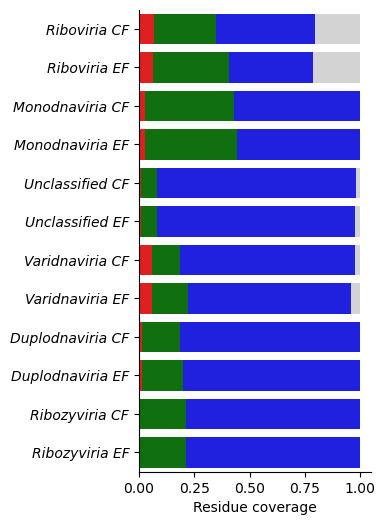

In [44]:
# change figure size
plt.figure(figsize=(3, 6))
sns.barplot(data=df_plot, y="realm", x=[1]*len(df_plot), color='lightgrey', alpha=1)
sns.barplot(df_plot, y="realm", x="prediction", color='blue', alpha=1)
sns.barplot(df_plot, y="realm", x="pdb_template", color='green', alpha=1)
sns.barplot(df_plot, y="realm", x="pdb_structure_90%", color='red', alpha=1)
# remove the top and right lines
sns.despine()
# remove the y-axis label
plt.ylabel("")
plt.xlabel("Residue coverage")
# make y-tick labels italic
plt.yticks(fontstyle='italic')
# save the figure
#plt.savefig("90%_pdb_structure_template_coverage.svg", format="svg")
plt.show

In [4]:
#file_coverage = "./virus_proteins_pdb_structure_template_coverage.csv"
file_coverage = "./virus_proteins_ef_cf_coverage.csv"
df_coverage = pd.read_csv(file_coverage)
file_ictv = "~/1_dataset_preparation/msl38v2/VMR_MSL38_v2.xlsx"
df_ictv = pd.read_excel(file_ictv)

In [5]:
df_ictv_sub = df_ictv[["Sort", "Realm"]]
df_ictv_sub

,Sort,Realm
0,1,Adnaviria
1,2,Adnaviria
2,3,Adnaviria
3,4,Adnaviria
4,5,Adnaviria
...,...,...
12948,12949,NaN
12949,12950,NaN
12950,12951,NaN
12951,12952,NaN


In [6]:
# add realm to df_coverage
df_coverage = pd.merge(df_coverage, df_ictv_sub, left_on="Sort", right_on="Sort", how="left")

In [7]:
# replace Nan in realm with "Other"
df_coverage["Realm"].fillna("Unclassified", inplace=True)

In [8]:
# for each realm, calculate the sum of the coverage
df_coverage_plddt = df_coverage[["Realm", "ef_coverage", "ef_plddt_0_50", "ef_plddt_50_70", "ef_plddt_70_90",
                                 "ef_plddt_90_100", "cf_coverage", "cf_plddt_0_50", "cf_plddt_50_70",
                                 "cf_plddt_70_90", "cf_plddt_90_100"]].groupby(["Realm"]).sum()

In [9]:
df_coverage_plddt

,ef_coverage,ef_plddt_0_50,ef_plddt_50_70,ef_plddt_70_90,ef_plddt_90_100,cf_coverage,cf_plddt_0_50,cf_plddt_50_70,cf_plddt_70_90,cf_plddt_90_100
Realm,,,,,,,,,,
Duplodnaviria,5019487.0,3202783.0,745224.0,741016.0,330448.0,5098920.0,1691459.0,659525.0,1336497.0,1411439.0
Monodnaviria,1629153.0,709941.0,233214.0,294238.0,391703.0,1629153.0,358687.0,215458.0,372879.0,682129.0
Riboviria,6715189.0,3442523.0,1016774.0,1585442.0,669881.0,6789064.0,1085649.0,818382.0,2280082.0,2604951.0
Ribozyviria,3170.0,357.0,1266.0,969.0,564.0,3170.0,453.0,1244.0,855.0,618.0
Unclassified,5961305.0,3388486.0,983057.0,1004119.0,585272.0,6003124.0,1668515.0,861515.0,1563129.0,1909965.0
Varidnaviria,7702044.0,3491955.0,1281729.0,1766309.0,1162007.0,7710633.0,1535260.0,1086020.0,2239852.0,2849501.0


In [10]:
# calculate the percentage of plddt
df_coverage_plddt["ef_plddt_0_50_percent"] = round(df_coverage_plddt["ef_plddt_0_50"] / df_coverage_plddt["ef_coverage"], 3)
df_coverage_plddt["ef_plddt_50_70_percent"] = round(df_coverage_plddt["ef_plddt_50_70"] / df_coverage_plddt["ef_coverage"], 3)
df_coverage_plddt["ef_plddt_70_90_percent"] = round(df_coverage_plddt["ef_plddt_70_90"] / df_coverage_plddt["ef_coverage"], 3)
df_coverage_plddt["ef_plddt_90_100_percent"] = round(df_coverage_plddt["ef_plddt_90_100"] / df_coverage_plddt["ef_coverage"], 3)

df_coverage_plddt["cf_plddt_0_50_percent"] = round(df_coverage_plddt["cf_plddt_0_50"] / df_coverage_plddt["cf_coverage"], 3)
df_coverage_plddt["cf_plddt_50_70_percent"] = round(df_coverage_plddt["cf_plddt_50_70"] / df_coverage_plddt["cf_coverage"], 3)
df_coverage_plddt["cf_plddt_70_90_percent"] = round(df_coverage_plddt["cf_plddt_70_90"] / df_coverage_plddt["cf_coverage"], 3)
df_coverage_plddt["cf_plddt_90_100_percent"] = round(df_coverage_plddt["cf_plddt_90_100"] / df_coverage_plddt["cf_coverage"], 3)

In [11]:
df_coverage_plddt_mod = df_coverage_plddt[["ef_plddt_0_50_percent", "ef_plddt_50_70_percent", "ef_plddt_70_90_percent",
                                        "ef_plddt_90_100_percent", "cf_plddt_0_50_percent", "cf_plddt_50_70_percent",
                                        "cf_plddt_70_90_percent", "cf_plddt_90_100_percent"]]

In [12]:
df_ef = df_coverage_plddt_mod[['ef_plddt_0_50_percent', 'ef_plddt_50_70_percent', 'ef_plddt_70_90_percent', 'ef_plddt_90_100_percent']]
df_ef.columns = ['0-50', '50-70', '70-90', '90-100']
df_ef['type'] = 'EF'
df_ef

/tmp/ipykernel_3590368/574129114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ef['type'] = 'EF'


,0-50,50-70,70-90,90-100,type
Realm,,,,,
Duplodnaviria,0.638,0.148,0.148,0.066,EF
Monodnaviria,0.436,0.143,0.181,0.240,EF
Riboviria,0.513,0.151,0.236,0.100,EF
Ribozyviria,0.113,0.399,0.306,0.178,EF
Unclassified,0.568,0.165,0.168,0.098,EF
Varidnaviria,0.453,0.166,0.229,0.151,EF


In [13]:
df_cf = df_coverage_plddt_mod[['cf_plddt_0_50_percent', 'cf_plddt_50_70_percent', 'cf_plddt_70_90_percent', 'cf_plddt_90_100_percent']]
df_cf.columns = ['0-50', '50-70', '70-90', '90-100']
df_cf['type'] = 'CF'
df_cf

/tmp/ipykernel_3590368/23474904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cf['type'] = 'CF'


,0-50,50-70,70-90,90-100,type
Realm,,,,,
Duplodnaviria,0.332,0.129,0.262,0.277,CF
Monodnaviria,0.220,0.132,0.229,0.419,CF
Riboviria,0.160,0.121,0.336,0.384,CF
Ribozyviria,0.143,0.392,0.270,0.195,CF
Unclassified,0.278,0.144,0.260,0.318,CF
Varidnaviria,0.199,0.141,0.290,0.370,CF


In [14]:
# concatenate the two dataframes
df_plddt = pd.concat([df_ef, df_cf])

In [15]:
# index into a column
df_plddt.reset_index(inplace=True)
df_plddt['label'] = df_plddt['Realm'] + ' ' + df_plddt['type']
df_plddt

,Realm,0-50,50-70,70-90,90-100,type,label
0,Duplodnaviria,0.638,0.148,0.148,0.066,EF,Duplodnaviria EF
1,Monodnaviria,0.436,0.143,0.181,0.240,EF,Monodnaviria EF
2,Riboviria,0.513,0.151,0.236,0.100,EF,Riboviria EF
3,Ribozyviria,0.113,0.399,0.306,0.178,EF,Ribozyviria EF
4,Unclassified,0.568,0.165,0.168,0.098,EF,Unclassified EF
5,Varidnaviria,0.453,0.166,0.229,0.151,EF,Varidnaviria EF
6,Duplodnaviria,0.332,0.129,0.262,0.277,CF,Duplodnaviria CF
7,Monodnaviria,0.220,0.132,0.229,0.419,CF,Monodnaviria CF
8,Riboviria,0.160,0.121,0.336,0.384,CF,Riboviria CF
9,Ribozyviria,0.143,0.392,0.270,0.195,CF,Ribozyviria CF


In [16]:
# specify the order of the rows
order = ["Riboviria CF", "Riboviria EF", "Monodnaviria CF", "Monodnaviria EF",
         "Unclassified CF", "Unclassified EF", "Varidnaviria CF", "Varidnaviria EF",
         "Duplodnaviria CF", "Duplodnaviria EF", "Ribozyviria CF", "Ribozyviria EF"]
# turn label into a categorical variable
df_plddt['label'] = pd.Categorical(df_plddt['label'], categories=order, ordered=True)
# turn label into index
df_plddt.set_index('label', inplace=True)
# specify the index order based on the list
df_plddt.sort_index(inplace=True)

In [17]:
df_plddt

,Realm,0-50,50-70,70-90,90-100,type
label,,,,,,
Riboviria CF,Riboviria,0.160,0.121,0.336,0.384,CF
Riboviria EF,Riboviria,0.513,0.151,0.236,0.100,EF
Monodnaviria CF,Monodnaviria,0.220,0.132,0.229,0.419,CF
Monodnaviria EF,Monodnaviria,0.436,0.143,0.181,0.240,EF
Unclassified CF,Unclassified,0.278,0.144,0.260,0.318,CF
Unclassified EF,Unclassified,0.568,0.165,0.168,0.098,EF
Varidnaviria CF,Varidnaviria,0.199,0.141,0.290,0.370,CF
Varidnaviria EF,Varidnaviria,0.453,0.166,0.229,0.151,EF
Duplodnaviria CF,Duplodnaviria,0.332,0.129,0.262,0.277,CF


In [18]:
df_plddt_mod = df_plddt[['0-50', '50-70', '70-90', '90-100']]
df_plddt_mod

,0-50,50-70,70-90,90-100
label,,,,
Riboviria CF,0.160,0.121,0.336,0.384
Riboviria EF,0.513,0.151,0.236,0.100
Monodnaviria CF,0.220,0.132,0.229,0.419
Monodnaviria EF,0.436,0.143,0.181,0.240
Unclassified CF,0.278,0.144,0.260,0.318
Unclassified EF,0.568,0.165,0.168,0.098
Varidnaviria CF,0.199,0.141,0.290,0.370
Varidnaviria EF,0.453,0.166,0.229,0.151
Duplodnaviria CF,0.332,0.129,0.262,0.277


In [19]:
df_plddt_mod['0-50'] = 1 - df_plddt_mod['50-70'] - df_plddt_mod['70-90'] - df_plddt_mod['90-100']
df_plddt_mod['50-70'] = 1 - df_plddt_mod['70-90'] - df_plddt_mod['90-100']
df_plddt_mod['70-90'] = 1 - df_plddt_mod['90-100']
df_plddt_mod['90-100'] = 1

/tmp/ipykernel_3590368/1644765632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plddt_mod['0-50'] = 1 - df_plddt_mod['50-70'] - df_plddt_mod['70-90'] - df_plddt_mod['90-100']
/tmp/ipykernel_3590368/1644765632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plddt_mod['50-70'] = 1 - df_plddt_mod['70-90'] - df_plddt_mod['90-100']
/tmp/ipykernel_3590368/1644765632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [20]:
df_plddt_mod

,0-50,50-70,70-90,90-100
label,,,,
Riboviria CF,0.159,0.280,0.616,1
Riboviria EF,0.513,0.664,0.900,1
Monodnaviria CF,0.220,0.352,0.581,1
Monodnaviria EF,0.436,0.579,0.760,1
Unclassified CF,0.278,0.422,0.682,1
Unclassified EF,0.569,0.734,0.902,1
Varidnaviria CF,0.199,0.340,0.630,1
Varidnaviria EF,0.454,0.620,0.849,1
Duplodnaviria CF,0.332,0.461,0.723,1


<function matplotlib.pyplot.show(close=None, block=None)>

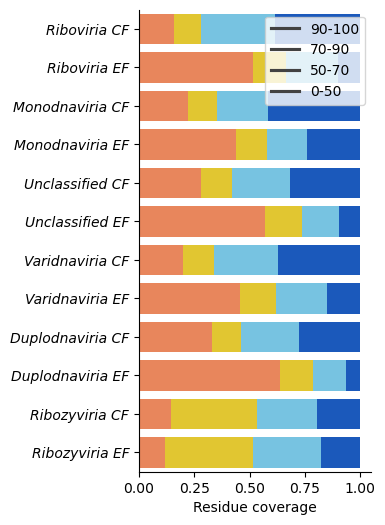

In [23]:
# change figure size
plt.figure(figsize=(3, 6))
sns.barplot(data=df_plddt_mod, y="label", x="90-100", color='#0053d6', alpha=1)
sns.barplot(data=df_plddt_mod, y="label", x="70-90", color='#65cbf3', alpha=1)
sns.barplot(data=df_plddt_mod, y="label", x="50-70", color='#ffdb13', alpha=1)
sns.barplot(data=df_plddt_mod, y="label", x="0-50", color='#ff7d45', alpha=1)
# remove the top and right lines
sns.despine()
# remove the y-axis label
plt.ylabel("")
plt.xlabel("Residue coverage")
# make y-tick labels italic
plt.yticks(fontstyle='italic')
#plt.savefig("plddt_coverage.svg", format="svg")
plt.show

# Template vs No template pLDDT plot

In [67]:
file_coverage = "./virus_proteins_pdb_template_coverage.csv"
df_coverage_plddt = pd.read_csv(file_coverage)

In [68]:
df_coverage_plddt

,header,protein_id,Sort,pept_cat,protlen,ef_coverage,cf_coverage,ef_pdb_template_coverage,ef_no_pdb_template_coverage,ef_pdb_template_plddt_0_50,...,cf_pdb_template_coverage,cf_no_pdb_template_coverage,cf_pdb_template_plddt_0_50,cf_pdb_template_plddt_50_70,cf_pdb_template_plddt_70_90,cf_pdb_template_plddt_90_100,cf_no_pdb_template_plddt_0_50,cf_no_pdb_template_plddt_50_70,cf_no_pdb_template_plddt_70_90,cf_no_pdb_template_plddt_90_100
0,CAA52564.1_4563,CAA52564.1,4563,protein,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AIW68525.1_11911,AIW68525.1,11911,protein,7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AIW68499.1_11911,AIW68499.1,11911,protein,8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AOO54533.1_11976,AOO54533.1,11976,protein,8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAA67112.1_4989,AAA67112.1,4989,protein,9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71269,ASO76148.1_10247,ASO76148.1,10247,protein,7861,1488.0,1488.0,444.0,1044.0,21.0,...,157.0,1331.0,0.0,6.0,31.0,120.0,26.0,116.0,433.0,756.0
71270,QRC47047.1_10244,QRC47047.1,10244,protein,8043,1357.0,1357.0,239.0,1118.0,0.0,...,0.0,1357.0,0.0,0.0,0.0,0.0,20.0,108.0,395.0,834.0
71271,AIJ50565.1_10246,AIJ50565.1,10246,protein,8108,2219.0,2219.0,397.0,1822.0,28.0,...,0.0,2219.0,0.0,0.0,0.0,0.0,606.0,219.0,455.0,939.0
71272,QRC47039.1_10254,QRC47039.1,10254,protein,8927,1392.0,1392.0,0.0,1392.0,0.0,...,0.0,1392.0,0.0,0.0,0.0,0.0,35.0,102.0,434.0,821.0


In [69]:
df_coverage_plddt_mod = df_coverage_plddt[["ef_coverage", "cf_coverage",
                                           "ef_pdb_template_coverage", "ef_pdb_template_plddt_0_50", "ef_pdb_template_plddt_50_70", "ef_pdb_template_plddt_70_90", "ef_pdb_template_plddt_90_100",
                                           "ef_no_pdb_template_coverage", "ef_no_pdb_template_plddt_0_50", "ef_no_pdb_template_plddt_50_70", "ef_no_pdb_template_plddt_70_90", "ef_no_pdb_template_plddt_90_100",
                                           "cf_pdb_template_coverage", "cf_pdb_template_plddt_0_50", "cf_pdb_template_plddt_50_70", "cf_pdb_template_plddt_70_90", "cf_pdb_template_plddt_90_100",
                                           "cf_no_pdb_template_coverage", "cf_no_pdb_template_plddt_0_50", "cf_no_pdb_template_plddt_50_70", "cf_no_pdb_template_plddt_70_90", "cf_no_pdb_template_plddt_90_100"]]

In [58]:
df_coverage_plddt_mod

,ef_coverage,cf_coverage,ef_pdb_template_coverage,ef_pdb_template_plddt_0_50,ef_pdb_template_plddt_50_70,ef_pdb_template_plddt_70_90,ef_pdb_template_plddt_90_100,ef_no_pdb_template_coverage,ef_no_pdb_template_plddt_0_50,ef_no_pdb_template_plddt_50_70,...,cf_pdb_template_coverage,cf_pdb_template_plddt_0_50,cf_pdb_template_plddt_50_70,cf_pdb_template_plddt_70_90,cf_pdb_template_plddt_90_100,cf_no_pdb_template_coverage,cf_no_pdb_template_plddt_0_50,cf_no_pdb_template_plddt_50_70,cf_no_pdb_template_plddt_70_90,cf_no_pdb_template_plddt_90_100
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71269,1488.0,1488.0,444.0,21.0,45.0,306.0,72.0,1044.0,367.0,254.0,...,157.0,0.0,6.0,31.0,120.0,1331.0,26.0,116.0,433.0,756.0
71270,1357.0,1357.0,239.0,0.0,13.0,217.0,9.0,1118.0,192.0,292.0,...,0.0,0.0,0.0,0.0,0.0,1357.0,20.0,108.0,395.0,834.0
71271,2219.0,2219.0,397.0,28.0,32.0,235.0,102.0,1822.0,491.0,724.0,...,0.0,0.0,0.0,0.0,0.0,2219.0,606.0,219.0,455.0,939.0
71272,1392.0,1392.0,0.0,0.0,0.0,0.0,0.0,1392.0,173.0,184.0,...,0.0,0.0,0.0,0.0,0.0,1392.0,35.0,102.0,434.0,821.0


In [70]:
df_coverage_plddt_sum = df_coverage_plddt_mod.sum()

In [72]:
# add it to the dataframe
df_coverage_plddt_sum = pd.DataFrame(df_coverage_plddt_sum).T

In [73]:
df_coverage_plddt_sum

,ef_coverage,cf_coverage,ef_pdb_template_coverage,ef_pdb_template_plddt_0_50,ef_pdb_template_plddt_50_70,ef_pdb_template_plddt_70_90,ef_pdb_template_plddt_90_100,ef_no_pdb_template_coverage,ef_no_pdb_template_plddt_0_50,ef_no_pdb_template_plddt_50_70,...,cf_pdb_template_coverage,cf_pdb_template_plddt_0_50,cf_pdb_template_plddt_50_70,cf_pdb_template_plddt_70_90,cf_pdb_template_plddt_90_100,cf_no_pdb_template_coverage,cf_no_pdb_template_plddt_0_50,cf_no_pdb_template_plddt_50_70,cf_no_pdb_template_plddt_70_90,cf_no_pdb_template_plddt_90_100
0,27030348.0,27234064.0,7447996.0,3106022.0,798573.0,1875596.0,1667805.0,19558844.0,11122028.0,3458269.0,...,6556565.0,297114.0,528031.0,1933304.0,3798116.0,20677499.0,6042909.0,3114113.0,5859990.0,5660487.0


In [53]:
7447996.0 + 19558844.0

27006840.0

In [55]:
7.447996 / 27.006840

0.2757818389711643

In [109]:
7.45 / 27.0

0.2759259259259259

In [54]:
6556565.0 + 20677499.0

27234064.0

In [110]:
6.556565 / 27.234064

0.24091076019096583

In [111]:
6.56 / 27.23

0.24091076019096583

In [112]:
(27234064.0 - 27006840.0) / 27006840

0.00841357226539647

In [60]:
df_coverage_plddt_sum

,ef_coverage,cf_coverage,ef_pdb_template_coverage,ef_pdb_template_plddt_0_50,ef_pdb_template_plddt_50_70,ef_pdb_template_plddt_70_90,ef_pdb_template_plddt_90_100,ef_no_pdb_template_coverage,ef_no_pdb_template_plddt_0_50,ef_no_pdb_template_plddt_50_70,...,cf_pdb_template_coverage,cf_pdb_template_plddt_0_50,cf_pdb_template_plddt_50_70,cf_pdb_template_plddt_70_90,cf_pdb_template_plddt_90_100,cf_no_pdb_template_coverage,cf_no_pdb_template_plddt_0_50,cf_no_pdb_template_plddt_50_70,cf_no_pdb_template_plddt_70_90,cf_no_pdb_template_plddt_90_100
0,27030348.0,27234064.0,7447996.0,3106022.0,798573.0,1875596.0,1667805.0,19558844.0,11122028.0,3458269.0,...,6556565.0,297114.0,528031.0,1933304.0,3798116.0,20677499.0,6042909.0,3114113.0,5859990.0,5660487.0


In [77]:
# calculate the sum of all coverages
df_coverage_plddt_sum_ef = df_coverage_plddt_sum[["ef_coverage",
                                                  "ef_pdb_template_coverage", "ef_pdb_template_plddt_0_50", "ef_pdb_template_plddt_50_70", "ef_pdb_template_plddt_70_90", "ef_pdb_template_plddt_90_100",
                                                  "ef_no_pdb_template_coverage", "ef_no_pdb_template_plddt_0_50", "ef_no_pdb_template_plddt_50_70", "ef_no_pdb_template_plddt_70_90", "ef_no_pdb_template_plddt_90_100"]]

In [78]:
df_coverage_plddt_sum_ef.columns = ["coverage",
                                    "pdb_template_coverage", "pdb_template_plddt_0_50", "pdb_template_plddt_50_70", "pdb_template_plddt_70_90", "pdb_template_plddt_90_100",
                                    "no_pdb_template_coverage", "no_pdb_template_plddt_0_50", "no_pdb_template_plddt_50_70", "no_pdb_template_plddt_70_90", "no_pdb_template_plddt_90_100"]

In [79]:
df_coverage_plddt_sum_ef['type'] = 'EF'

/tmp/ipykernel_3590368/3216774752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coverage_plddt_sum_ef['type'] = 'EF'


In [80]:
df_coverage_plddt_sum_ef

,coverage,pdb_template_coverage,pdb_template_plddt_0_50,pdb_template_plddt_50_70,pdb_template_plddt_70_90,pdb_template_plddt_90_100,no_pdb_template_coverage,no_pdb_template_plddt_0_50,no_pdb_template_plddt_50_70,no_pdb_template_plddt_70_90,no_pdb_template_plddt_90_100,type
0,27030348.0,7447996.0,3106022.0,798573.0,1875596.0,1667805.0,19558844.0,11122028.0,3458269.0,3508407.0,1470140.0,EF


In [81]:
# calculate the sum of all coverages
df_coverage_plddt_sum_cf = df_coverage_plddt_sum[["cf_coverage",
                                                  "cf_pdb_template_coverage", "cf_pdb_template_plddt_0_50", "cf_pdb_template_plddt_50_70", "cf_pdb_template_plddt_70_90", "cf_pdb_template_plddt_90_100",
                                                  "cf_no_pdb_template_coverage", "cf_no_pdb_template_plddt_0_50", "cf_no_pdb_template_plddt_50_70", "cf_no_pdb_template_plddt_70_90", "cf_no_pdb_template_plddt_90_100"]]

In [82]:
df_coverage_plddt_sum_cf.columns = ["coverage",
                                    "pdb_template_coverage", "pdb_template_plddt_0_50", "pdb_template_plddt_50_70", "pdb_template_plddt_70_90", "pdb_template_plddt_90_100",
                                    "no_pdb_template_coverage", "no_pdb_template_plddt_0_50", "no_pdb_template_plddt_50_70", "no_pdb_template_plddt_70_90", "no_pdb_template_plddt_90_100"]

In [83]:
df_coverage_plddt_sum_cf['type'] = 'CF'

/tmp/ipykernel_3590368/3665198312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coverage_plddt_sum_cf['type'] = 'CF'


In [84]:
# concatenate the two dataframes
df_coverage_plddt_sum = pd.concat([df_coverage_plddt_sum_ef, df_coverage_plddt_sum_cf])

In [85]:
df_coverage_plddt_sum

,coverage,pdb_template_coverage,pdb_template_plddt_0_50,pdb_template_plddt_50_70,pdb_template_plddt_70_90,pdb_template_plddt_90_100,no_pdb_template_coverage,no_pdb_template_plddt_0_50,no_pdb_template_plddt_50_70,no_pdb_template_plddt_70_90,no_pdb_template_plddt_90_100,type
0,27030348.0,7447996.0,3106022.0,798573.0,1875596.0,1667805.0,19558844.0,11122028.0,3458269.0,3508407.0,1470140.0,EF
0,27234064.0,6556565.0,297114.0,528031.0,1933304.0,3798116.0,20677499.0,6042909.0,3114113.0,5859990.0,5660487.0,CF


In [86]:
df_coverage_plddt_sum["pdb_template_plddt_0_50_percent"] = round(df_coverage_plddt_sum["pdb_template_plddt_0_50"] / df_coverage_plddt_sum["pdb_template_coverage"], 3)
df_coverage_plddt_sum["pdb_template_plddt_50_70_percent"] = round(df_coverage_plddt_sum["pdb_template_plddt_50_70"] / df_coverage_plddt_sum["pdb_template_coverage"], 3)
df_coverage_plddt_sum["pdb_template_plddt_70_90_percent"] = round(df_coverage_plddt_sum["pdb_template_plddt_70_90"] / df_coverage_plddt_sum["pdb_template_coverage"], 3)
df_coverage_plddt_sum["pdb_template_plddt_90_100_percent"] = round(df_coverage_plddt_sum["pdb_template_plddt_90_100"] / df_coverage_plddt_sum["pdb_template_coverage"], 3)

df_coverage_plddt_sum["no_pdb_template_plddt_0_50_percent"] = round(df_coverage_plddt_sum["no_pdb_template_plddt_0_50"] / df_coverage_plddt_sum["no_pdb_template_coverage"], 3)
df_coverage_plddt_sum["no_pdb_template_plddt_50_70_percent"] = round(df_coverage_plddt_sum["no_pdb_template_plddt_50_70"] / df_coverage_plddt_sum["no_pdb_template_coverage"], 3)
df_coverage_plddt_sum["no_pdb_template_plddt_70_90_percent"] = round(df_coverage_plddt_sum["no_pdb_template_plddt_70_90"] / df_coverage_plddt_sum["no_pdb_template_coverage"], 3)
df_coverage_plddt_sum["no_pdb_template_plddt_90_100_percent"] = round(df_coverage_plddt_sum["no_pdb_template_plddt_90_100"] / df_coverage_plddt_sum["no_pdb_template_coverage"], 3)

In [87]:
# make a percentage dataframe
df_coverage_plddt_sum_percent = df_coverage_plddt_sum[["type",
                                                       "pdb_template_plddt_0_50_percent", "pdb_template_plddt_50_70_percent", "pdb_template_plddt_70_90_percent", "pdb_template_plddt_90_100_percent",
                                                       "no_pdb_template_plddt_0_50_percent", "no_pdb_template_plddt_50_70_percent", "no_pdb_template_plddt_70_90_percent", "no_pdb_template_plddt_90_100_percent"]]


In [94]:
df_coverage_plddt_sum_percent

,type,pdb_template_plddt_0_50_percent,pdb_template_plddt_50_70_percent,pdb_template_plddt_70_90_percent,pdb_template_plddt_90_100_percent,no_pdb_template_plddt_0_50_percent,no_pdb_template_plddt_50_70_percent,no_pdb_template_plddt_70_90_percent,no_pdb_template_plddt_90_100_percent
0,EF,0.417,0.524,0.776,1.0,0.569,0.746,0.925,1.0
0,CF,0.045,0.126,0.421,1.0,0.292,0.443,0.726,1.0


In [93]:
df_coverage_plddt_sum_percent['pdb_template_plddt_50_70_percent'] = df_coverage_plddt_sum_percent['pdb_template_plddt_0_50_percent'] + df_coverage_plddt_sum_percent['pdb_template_plddt_50_70_percent']
df_coverage_plddt_sum_percent['pdb_template_plddt_70_90_percent'] = df_coverage_plddt_sum_percent['pdb_template_plddt_50_70_percent'] + df_coverage_plddt_sum_percent['pdb_template_plddt_70_90_percent']
df_coverage_plddt_sum_percent['pdb_template_plddt_90_100_percent'] = df_coverage_plddt_sum_percent['pdb_template_plddt_70_90_percent'] + df_coverage_plddt_sum_percent['pdb_template_plddt_90_100_percent']

df_coverage_plddt_sum_percent['no_pdb_template_plddt_50_70_percent'] = df_coverage_plddt_sum_percent['no_pdb_template_plddt_0_50_percent'] + df_coverage_plddt_sum_percent['no_pdb_template_plddt_50_70_percent']
df_coverage_plddt_sum_percent['no_pdb_template_plddt_70_90_percent'] = df_coverage_plddt_sum_percent['no_pdb_template_plddt_50_70_percent'] + df_coverage_plddt_sum_percent['no_pdb_template_plddt_70_90_percent']
df_coverage_plddt_sum_percent['no_pdb_template_plddt_90_100_percent'] = df_coverage_plddt_sum_percent['no_pdb_template_plddt_70_90_percent'] + df_coverage_plddt_sum_percent['no_pdb_template_plddt_90_100_percent']

/tmp/ipykernel_3590368/45373082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coverage_plddt_sum_percent['pdb_template_plddt_50_70_percent'] = df_coverage_plddt_sum_percent['pdb_template_plddt_0_50_percent'] + df_coverage_plddt_sum_percent['pdb_template_plddt_50_70_percent']
/tmp/ipykernel_3590368/45373082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coverage_plddt_sum_percent['pdb_template_plddt_70_90_percent'] = df_coverage_plddt_sum_percent['pdb_template_plddt_50_70_percent'] + df_cove

In [95]:
df_coverage_plddt_sum_percent_temp = df_coverage_plddt_sum_percent[['type', 'pdb_template_plddt_0_50_percent', 'pdb_template_plddt_50_70_percent',
                                                                    'pdb_template_plddt_70_90_percent', 'pdb_template_plddt_90_100_percent']]

In [97]:
df_coverage_plddt_sum_percent_temp['type'] = df_coverage_plddt_sum_percent_temp['type'] + ' template'
df_coverage_plddt_sum_percent_temp.columns = ['type', '0-50', '50-70', '70-90', '90-100']

/tmp/ipykernel_3590368/2939856178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coverage_plddt_sum_percent_temp['type'] = df_coverage_plddt_sum_percent_temp['type'] + ' template'


In [96]:
df_coverage_plddt_sum_percent_no_temp = df_coverage_plddt_sum_percent[['type', 'no_pdb_template_plddt_0_50_percent', 'no_pdb_template_plddt_50_70_percent',
                                                                    'no_pdb_template_plddt_70_90_percent', 'no_pdb_template_plddt_90_100_percent']]

In [98]:
df_coverage_plddt_sum_percent_no_temp['type'] = df_coverage_plddt_sum_percent_no_temp['type'] + ' no template'
df_coverage_plddt_sum_percent_no_temp.columns = ['type', '0-50', '50-70', '70-90', '90-100']

/tmp/ipykernel_3590368/1913509832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coverage_plddt_sum_percent_no_temp['type'] = df_coverage_plddt_sum_percent_no_temp['type'] + ' no template'


In [99]:
# concatenate the two dataframes
df_coverage_plddt_sum_percent = pd.concat([df_coverage_plddt_sum_percent_temp, df_coverage_plddt_sum_percent_no_temp])

In [100]:
df_coverage_plddt_sum_percent

,type,0-50,50-70,70-90,90-100
0,EF template,0.417,0.524,0.776,1.0
0,CF template,0.045,0.126,0.421,1.0
0,EF no template,0.569,0.746,0.925,1.0
0,CF no template,0.292,0.443,0.726,1.0


<function matplotlib.pyplot.show(close=None, block=None)>

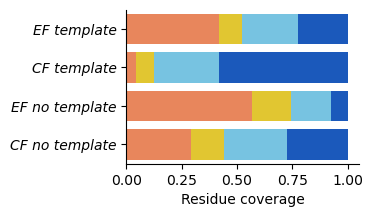

In [107]:
# change figure size
plt.figure(figsize=(3, 2))
sns.barplot(data=df_coverage_plddt_sum_percent, y="type", x="90-100", color='#0053d6', alpha=1)
sns.barplot(data=df_coverage_plddt_sum_percent, y="type", x="70-90", color='#65cbf3', alpha=1)
sns.barplot(data=df_coverage_plddt_sum_percent, y="type", x="50-70", color='#ffdb13', alpha=1)
sns.barplot(data=df_coverage_plddt_sum_percent, y="type", x="0-50", color='#ff7d45', alpha=1)
# remove the top and right lines
sns.despine()
# remove the y-axis label
plt.ylabel("")
plt.xlabel("Residue coverage")
# make y-tick labels italic
plt.yticks(fontstyle='italic')
plt.savefig("plddt_coverage_ef_cf_template_no_template.svg", format="svg")
plt.show